In [60]:
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 
%matplotlib inline

In [61]:
df = pd.read_csv('/Users/amsurve/PROJECTS/gg2/data/bbc_cleaned.csv')

In [62]:
df.shape

(2225, 7)

In [63]:
df.sample(5)    

Unnamed: 0  Unnamed: 0.1       category  \
1152        1152          1152          sport   
696          696           696       business   
143          143           143  entertainment   
2022        2022          2022           tech   
2068        2068          2068           tech   

                                  title  \
1152  Johnson accuses British sprinters   
696   Asia quake increases poverty risk   
143   Queen recruit singer for new tour   
2022    US blogger fired by her airline   
2068   Peer-to-peer nets 'here to stay'   

                                                   text  label  \
1152  Johnson accuses British sprinters\n\nFormer Ol...      2   
696   Asia quake increases poverty risk\n\nNearly tw...      1   
143   Queen recruit singer for new tour\n\nThe remai...      3   
2022  US blogger fired by her airline\n\nA US airlin...      0   
2068  Peer-to-peer nets 'here to stay'\n\nPeer-to-pe...      0   

                                           cleaned_text  
1152  johnson accuse british sprinter former olympic...  
696   asia quake increase poverty risk nearly two mi...  
143   queen recruit singer new tour remain member ro...  
2022  us blogger fire airline attendant suspend inap...  
2068  peer net stay network verge exploit commercial...

In [64]:
label_df = df[['category', 'label']].drop_duplicates().sort_values('label').reset_index().drop('index',1)
label_df

category  label
0           tech      0
1       business      1
2          sport      2
3  entertainment      3
4       politics      4

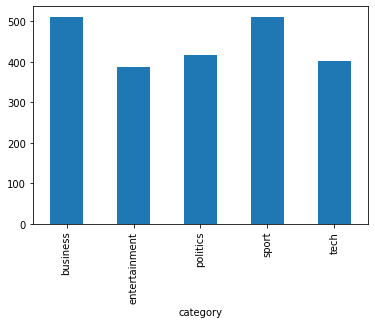

In [65]:
df.groupby('category').label.count().plot.bar(ylim=0)

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.cleaned_text).toarray() # Remaps the words in the 1490 articles in the text column of 
                                                  # data frame into features (superset of words) with an importance assigned 
                                                  # based on each words frequency in the document and across documents

labels = df.label                           # represents the category of each of the 1490 articles
print(features.shape )

(2225, 9265)


In [67]:
from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords=None,
                min_font_size = 10).generate(text) 
             
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud_instance) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

### Wordcloud for entire data

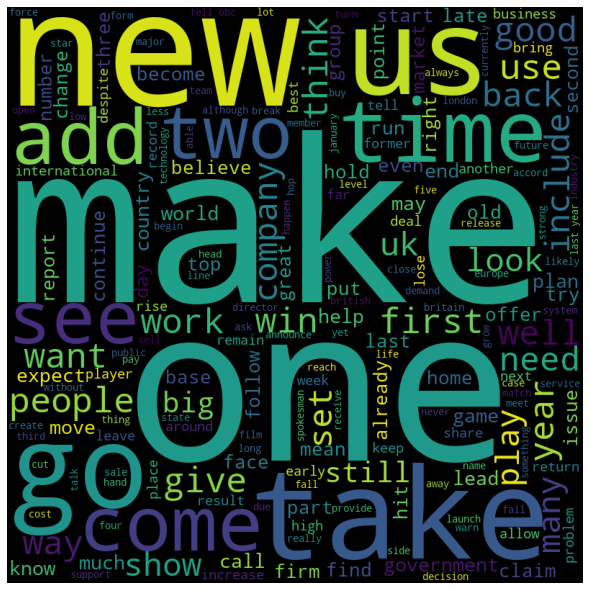

In [68]:
texts = ''
for index, item in df.iterrows():
    texts = texts + ' ' + item['cleaned_text']
    
plot_word_cloud(texts)

### Wordcloud for each category

In [69]:
def plot_word_cloud_for_category(df, category):
    text_df = df.loc[df['category'] == str(category)]
    texts = ''
    for index, item in text_df.iterrows():
        texts = texts + ' ' + item['cleaned_text']
    
    plot_word_cloud(texts)


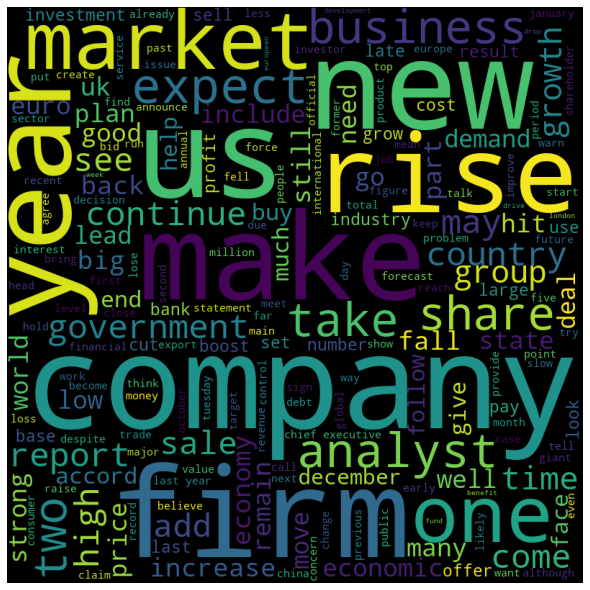

In [71]:
plot_word_cloud_for_category(df,'business')

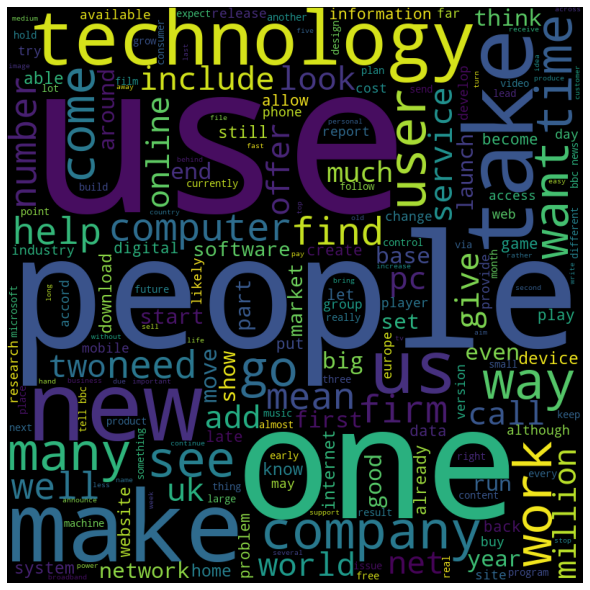

In [70]:
plot_word_cloud_for_category(df,'tech')

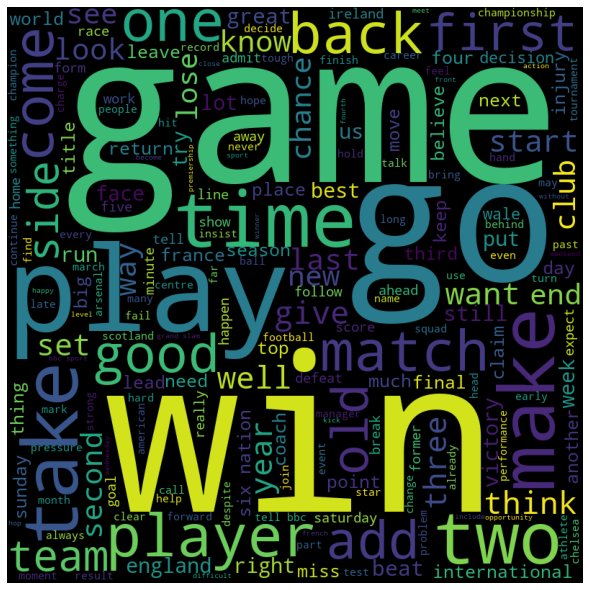

In [72]:
plot_word_cloud_for_category(df,'sport')

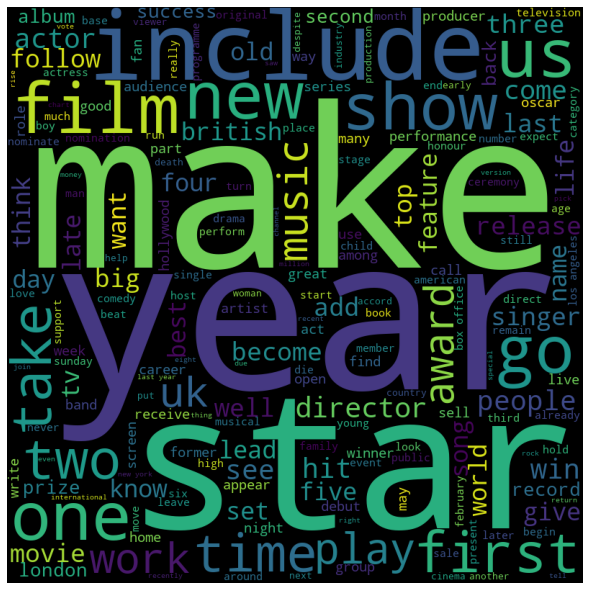

In [73]:
plot_word_cloud_for_category(df,'entertainment')

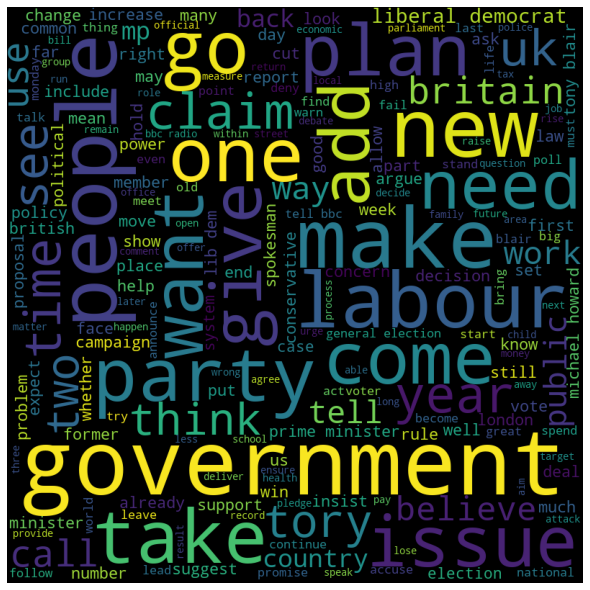

In [74]:
plot_word_cloud_for_category(df,'politics')

In [77]:
from sklearn.feature_selection import chi2
category2label = {'tech':0,'business':1,'sport':2,'entertainment':3,'politics':4}
N = 3  # We are going to look for top 3 categories

for category, label in sorted(category2label.items()):
    features_chi2 = chi2(features, labels == label)                   # Do chi2 analyses of all items in this category
    indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
    feature_names = np.array(tfidf.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
    print('*'*50)
    print("# '{}':".format(category))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat
print('*'*50)

**************************************************
# 'business':
  . Most correlated unigrams:
       . analyst
       . bank
       . growth
  . Most correlated bigrams:
       . chief executive
       . oil price
       . stock market
**************************************************
# 'entertainment':
  . Most correlated unigrams:
       . film
       . singer
       . actor
  . Most correlated bigrams:
       . martin scorsese
       . box office
       . los angeles
**************************************************
# 'politics':
  . Most correlated unigrams:
       . blair
       . labour
       . tory
  . Most correlated bigrams:
       . michael howard
       . tony blair
       . liberal democrat
**************************************************
# 'sport':
  . Most correlated unigrams:
       . cup
       . champion
       . coach
  . Most correlated bigrams:
       . champion league
       . bbc sport
       . grand slam
**************************************************
# 